In [1]:
from algorithm_ranking import MeasurementsSimulator, MeasurementsVisualizer, RankVariantsSort2, RankVariantsDFGTr

In [2]:
import pandas as pd
import numpy as np

In [3]:
cfg = {}
cfg['t0']  = [0.2,0.01] #[mean, std]
cfg['t1']  = [0.22,0.01]
cfg['t2']  = [0.23,0.05]
cfg['t3']  = [0.24,0.01]
#cfg['t4']  = [0.24,0.01]
h0 = list(cfg.keys())

In [4]:
ms = MeasurementsSimulator(cfg, 'normal',seed=1459) 
ms.measure(20,1)

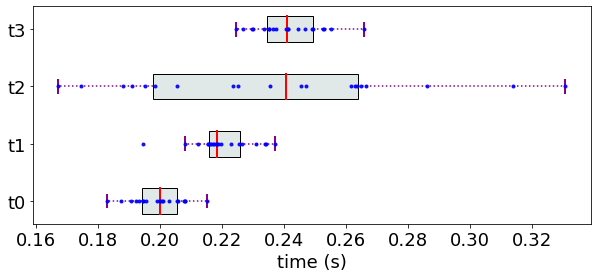

In [9]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(scale=1.0,tick_size=18)

In [10]:
fig.savefig("valid-3.pdf", format="pdf", bbox_inches="tight")

In [6]:
#h0 = ['t0','t1','t2','t3','t4']
h0 = ['t1','t3','t2','t0']
#h0 = ['t0','t1','t3','t2']

rv = RankVariantsSort2(ms.get_alg_measurements(), h0)

In [7]:
rv.sort_h0_by_iqr()

,algs,iqr
1,t1,0.009881
0,t0,0.011520
3,t3,0.014568
2,t2,0.066265


In [8]:
rv.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t0,0
1,t1,1
2,t3,2
3,t2,2


In [9]:
q_maxs=[75, 70, 65, 60]
q_mins=[25, 30, 35, 40]

df_r, qlims, avg_rels, rels = rv.rank_variants_reliable(q_maxs=q_maxs, q_mins=q_mins)

In [10]:
df_r[['case:concept:name', 'case:mean-rank']+qlims]

,case:concept:name,case:mean-rank,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q60-q40
0,t0,0.0,0,0,0,0
1,t1,1.0,1,1,1,1
2,t3,2.0,2,2,2,2
3,t2,2.0,2,2,2,2


In [11]:
rv.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t0,0
1,t1,1
2,t3,2
3,t2,2


In [12]:
avg_rels

{'case:rank:q75-q25': 0.0,
 'case:rank:q70-q30': 0.0,
 'case:rank:q65-q35': 0.0,
 'case:rank:q60-q40': 0.0}

In [13]:
rvDFG = RankVariantsDFGTr(ms.get_alg_measurements(), h0)

In [14]:
rvDFG.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t2,0
1,t0,0
2,t1,1
3,t3,2


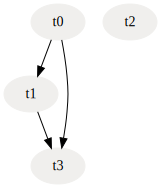

In [17]:
g = rvDFG.graph.visualize()
g

In [19]:
g.render(filename='gviz/met-dfg', format='pdf')

'gviz/met-dfg.pdf'

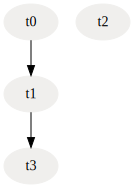

In [20]:
rvDFG.graph.transitivity_reduction()
g = rvDFG.graph.visualize()
g

In [21]:
g.render(filename='gviz/met-dfg-tr', format='pdf')

'gviz/met-dfg-tr.pdf'

In [55]:
q_maxs=[75, 70, 65, 60]
q_mins=[25, 30, 35, 40]

df_r, qlims, avg_rels, rels = rvDFG.rank_variants_reliable(q_maxs=q_maxs, q_mins=q_mins)

In [56]:
df_r[['case:concept:name', 'case:mean-rank']+qlims]

,case:concept:name,case:mean-rank,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35
0,t0,0.00,0,0,0
1,t1,0.00,0,0,0
2,t2,0.50,0,0,1
3,t3,1.25,1,1,1
4,t4,1.00,1,1,1


In [57]:
avg_rels

{'case:rank:q75-q25': -0.15,
 'case:rank:q70-q30': -0.15,
 'case:rank:q65-q35': -0.15,
 'case:rank:q60-q40': -0.25}

In [21]:
cfg = {}
cfg['t0']  = [0.2,0.04] #[mean, std]
cfg['t1']  = [0.21,0.03]
cfg['t2']  = [0.22,0.02]
cfg['t3']  = [0.235,0.01]
cfg['t4']  = [0.245,0.005]
h0 = list(cfg.keys())

In [22]:
ms = MeasurementsSimulator(cfg, 'normal',seed=1459) 
ms.measure(20,1)

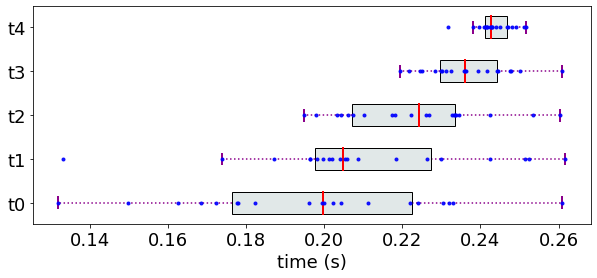

In [23]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(tick_size=18, scale=0.8)

In [24]:
fig.savefig("counter-2.pdf", format="pdf", bbox_inches="tight")

In [25]:
rv = RankVariantsSort2(ms.get_alg_measurements(), h0)
rv.sort_h0_by_iqr()

,algs,iqr
4,t4,0.005532
3,t3,0.014568
2,t2,0.026506
1,t1,0.029643
0,t0,0.046078


In [29]:
q_maxs=[75, 70, 65, 60]
q_mins=[25, 30, 35, 40]

df_r, qlims, avg_rels, rels = rv.rank_variants_reliable(q_maxs=q_maxs, q_mins=q_mins)

In [30]:
df_r[['case:concept:name', 'case:mean-rank']+qlims]

,case:concept:name,case:mean-rank,case:rank:q65-q35
0,t4,1.25,2
1,t3,0.75,1
2,t2,0.50,1
3,t1,0.00,0
4,t0,0.00,0


In [144]:
avg_rels

{'case:rank:q75-q25': -0.5,
 'case:rank:q70-q30': -0.5,
 'case:rank:q65-q35': -0.3,
 'case:rank:q60-q40': -0.7}

In [26]:
rv.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t4,0
1,t3,0
2,t2,0
3,t1,0
4,t0,0


In [31]:
rvDFG = RankVariantsDFGTr(ms.get_alg_measurements(), h0)

In [32]:
rvDFG.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t0,0
1,t1,0
2,t2,0
3,t3,1
4,t4,1


In [33]:
q_maxs=[75, 70, 65, 60]
q_mins=[25, 30, 35, 40]

df_r, qlims, avg_rels, rels = rvDFG.rank_variants_reliable(q_maxs=q_maxs, q_mins=q_mins)
df_r[['case:concept:name', 'case:mean-rank']+qlims]

,case:concept:name,case:mean-rank,case:rank:q65-q35
0,t0,0.00,0
1,t1,0.00,0
2,t2,0.50,1
3,t3,1.25,1
4,t4,1.75,2


In [148]:
avg_rels

{'case:rank:q75-q25': -0.3,
 'case:rank:q70-q30': -0.3,
 'case:rank:q65-q35': -0.2,
 'case:rank:q60-q40': -0.5}

In [4]:
cfg = {}
cfg['t0']  = [0.2,0.02] #[mean, std]
cfg['t1']  = [0.2,0.02]
cfg['t2']  = [0.2,0.02]
cfg['t3']  = [0.2,0.02]
cfg['t4']  = [0.2,0.02]
cfg['t5']  = [0.3,0.02] #[mean, std]
cfg['t6']  = [0.3,0.02]
cfg['t7']  = [0.3,0.02]
cfg['t8']  = [0.3,0.02]
cfg['t9']  = [0.3,0.02]
h0 = list(cfg.keys())

In [5]:
ms = MeasurementsSimulator(cfg, 'normal',seed=1459) 
ms.measure(3,1)

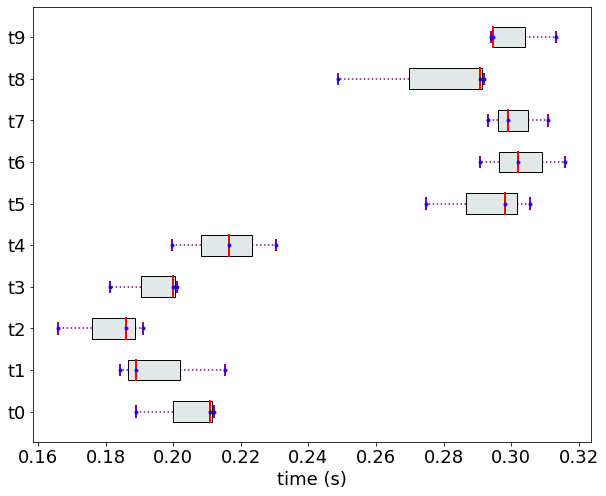

In [6]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(tick_size=18, scale=0.8)

In [7]:
rvDFG = RankVariantsDFGTr(ms.get_alg_measurements(), h0)

In [8]:
rvDFG.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t1,0
1,t2,0
2,t0,1
3,t3,1
4,t4,2
5,t5,3
6,t8,3
7,t6,4
8,t7,4
9,t9,4


In [11]:
rvDFG.graph.get_separable_arrangement()

['t2', 't1', 't3', 't0', 't4', 't8', 't5', 't6', 't7', 't9']

In [13]:
rv = RankVariantsSort2(ms.get_alg_measurements(), h0)
#rv.sort_h0_by_iqr()
rv.alg_seq_h0 = rvDFG.graph.get_separable_arrangement().copy()

In [14]:
rv.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t2,0
1,t1,0
2,t3,0
3,t0,0
4,t4,0
5,t8,1
6,t5,1
7,t6,1
8,t7,1
9,t9,1


In [165]:
avg_rels

{'case:rank:q75-q25': -0.65,
 'case:rank:q70-q30': -0.55,
 'case:rank:q65-q35': -0.15,
 'case:rank:q60-q40': -1.15}